In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv("../../assets/datasets/mtcars.csv")

Convert to a Pandas Dataframe

In [4]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [5]:
car = df['Car']

Loop through Cars List and Convert to Numeric

In [6]:
cars = list(df['Car'].unique())

In [7]:
car_nums = {car:num for num, car in enumerate(cars)}

In [8]:
df['car_numeric'] = df['Car'].apply(lambda x: car_nums[x])

Append to dataframe

In [9]:
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1


Plot the Data (Can Plot for Various Combinations of Variables)

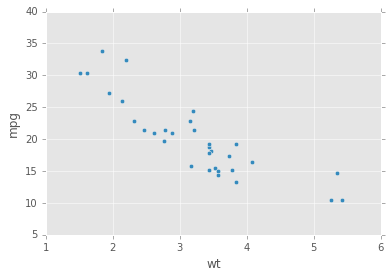

In [10]:
df.plot(kind='scatter',x='wt',y='mpg')
## Try this for multiple variable combinations

In [11]:
import seaborn as sns

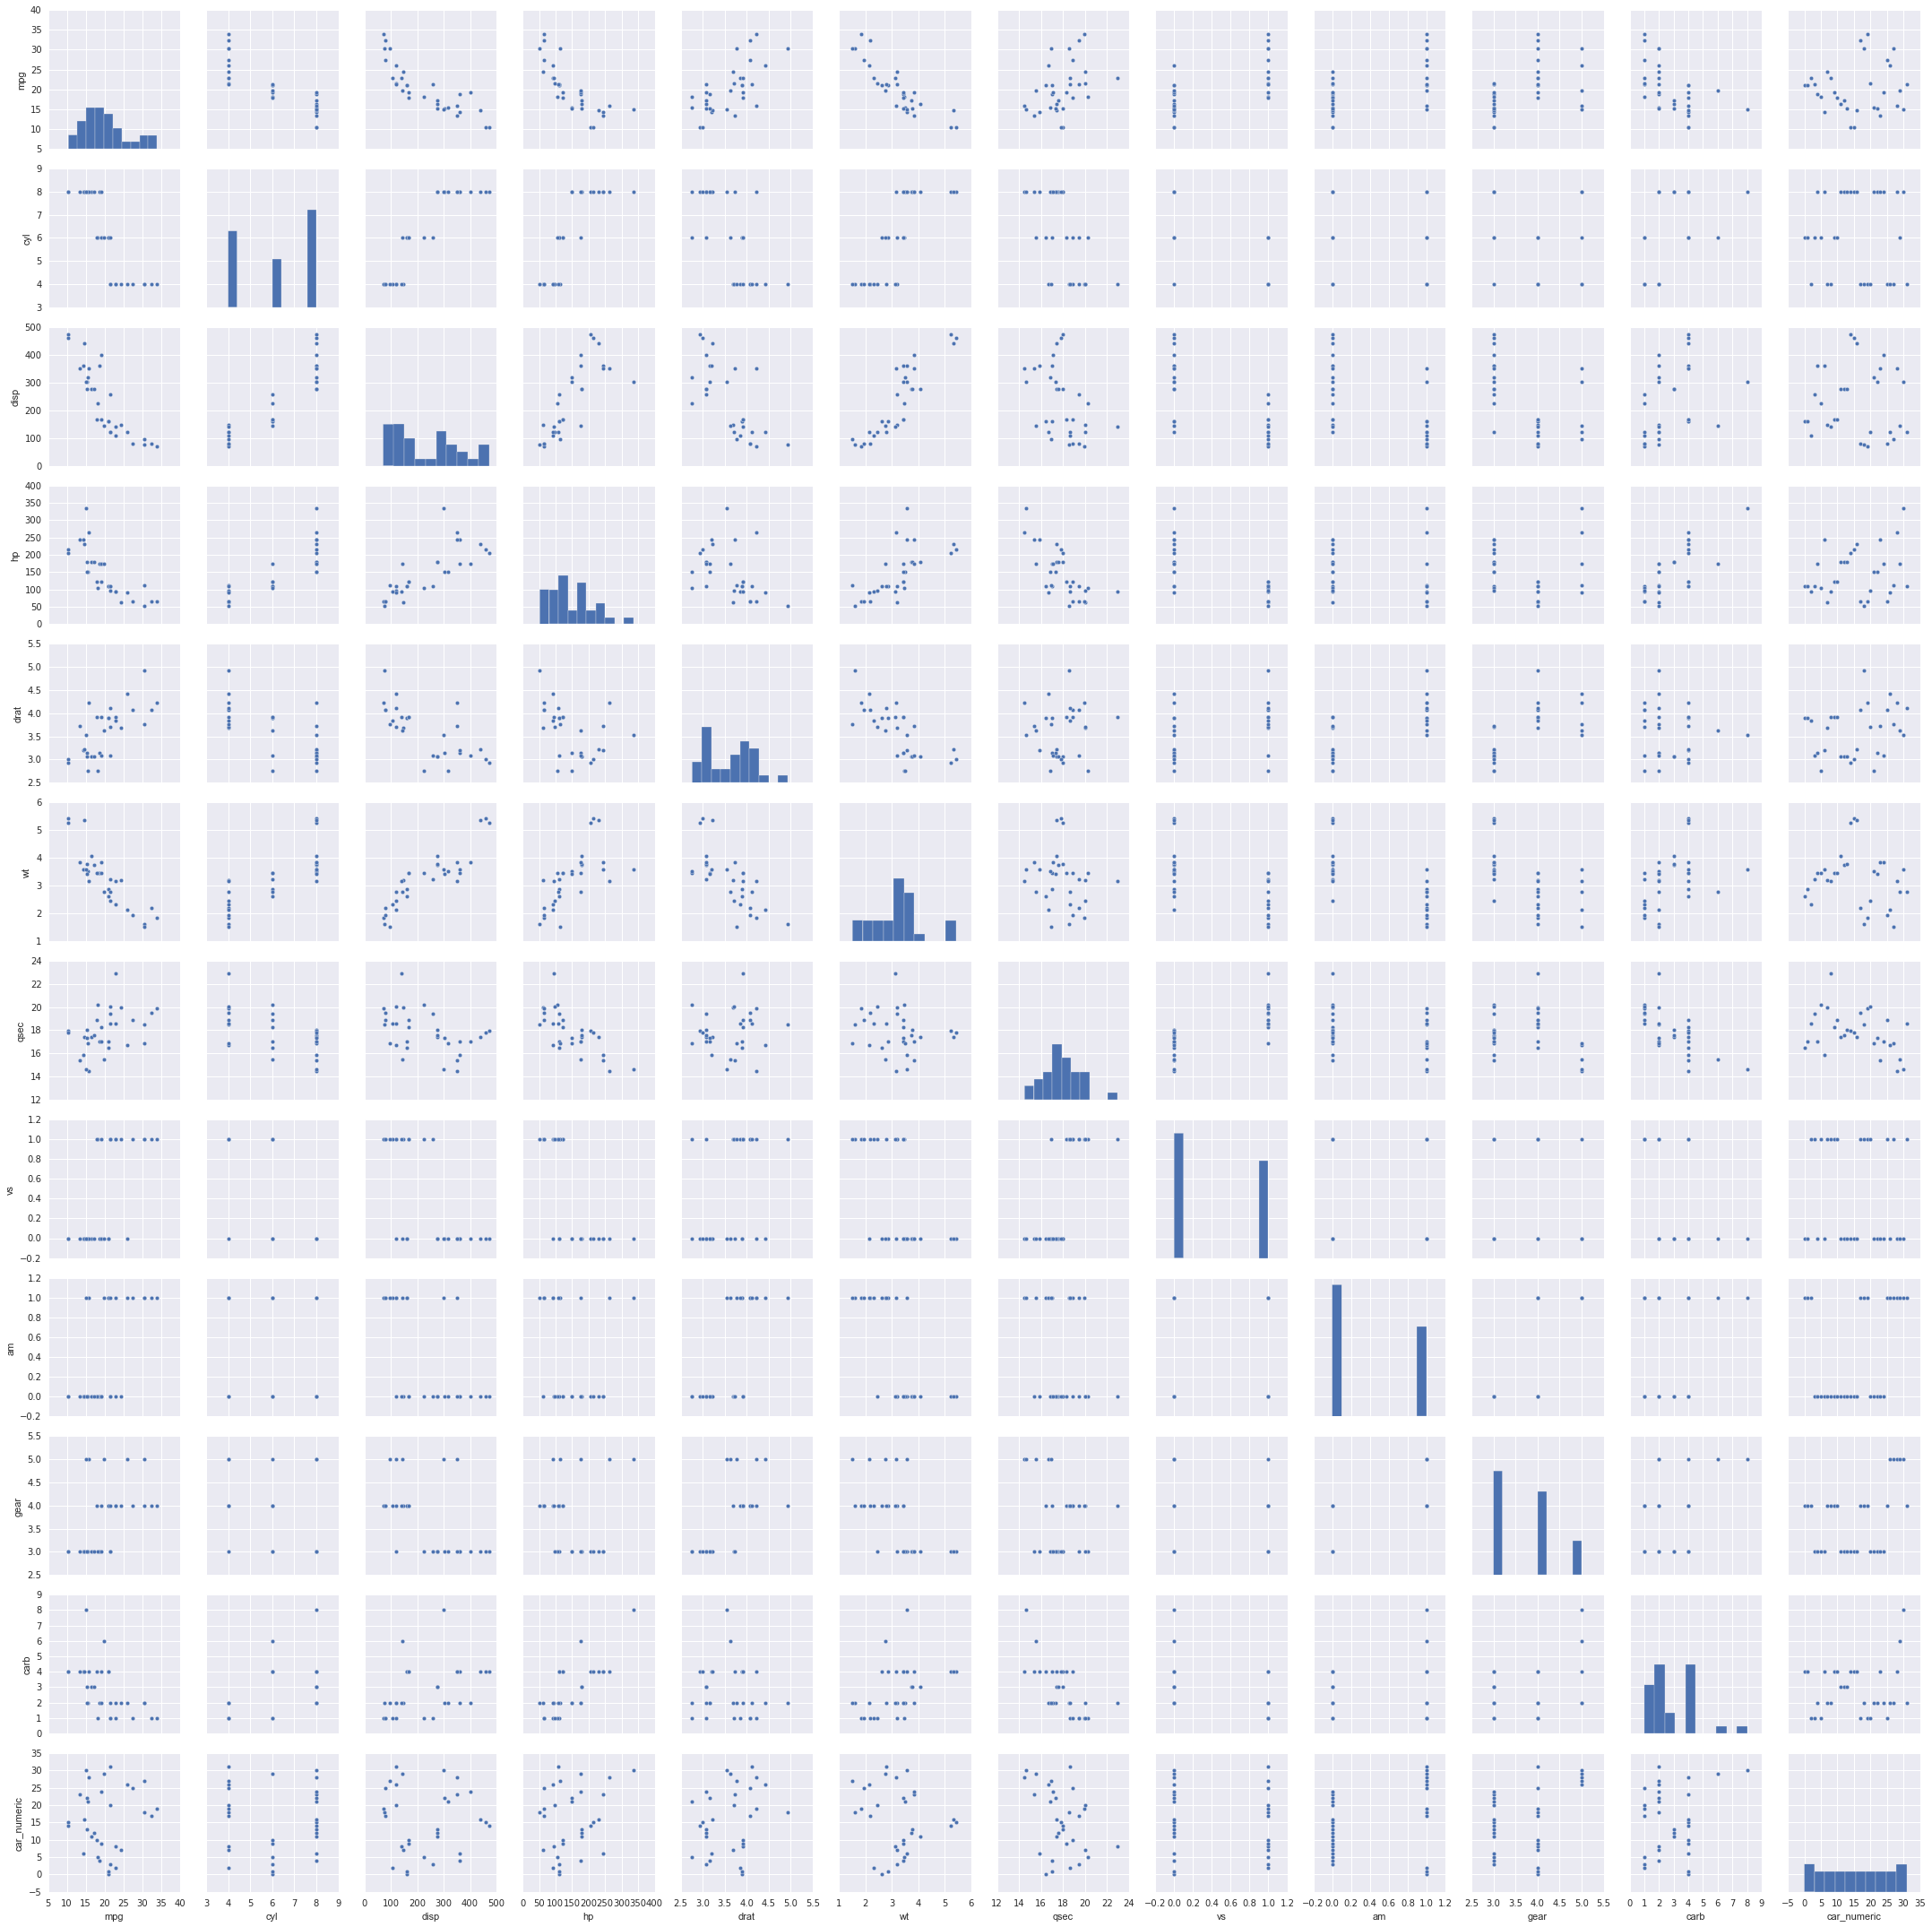

In [12]:
sns.pairplot(df)

Convert to Matrix

In [13]:
X = df.iloc[:,1:]

In [14]:
from sklearn import preprocessing

In [15]:
X_scaled = preprocessing.scale(X)

Cluster - Choose K based on plot and variables chosen

In [18]:
s = []
i = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    s_i = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    s.append(s_i)
    i.append(kmeans.inertia_)

Find the Silhoutte Score and plot

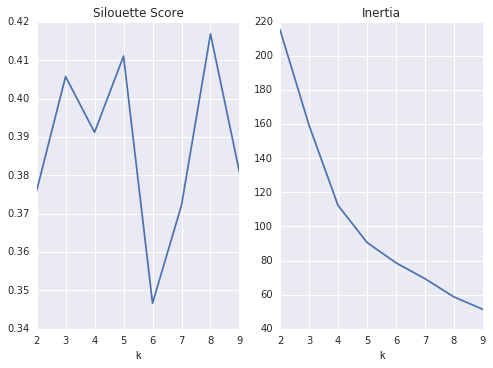

In [19]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(range(2,10), s)
ax1.set_title("Silouette Score")
ax1.set_xlabel("k")

ax2.plot(range(2,10), i)
ax2.set_title("Inertia")
ax2.set_xlabel("k")

sns.despine()

In [20]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [21]:
df['label'] = labels

In [22]:
X.columns

Index([u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec', u'vs', u'am',
       u'gear', u'carb', u'car_numeric'],
      dtype='object')

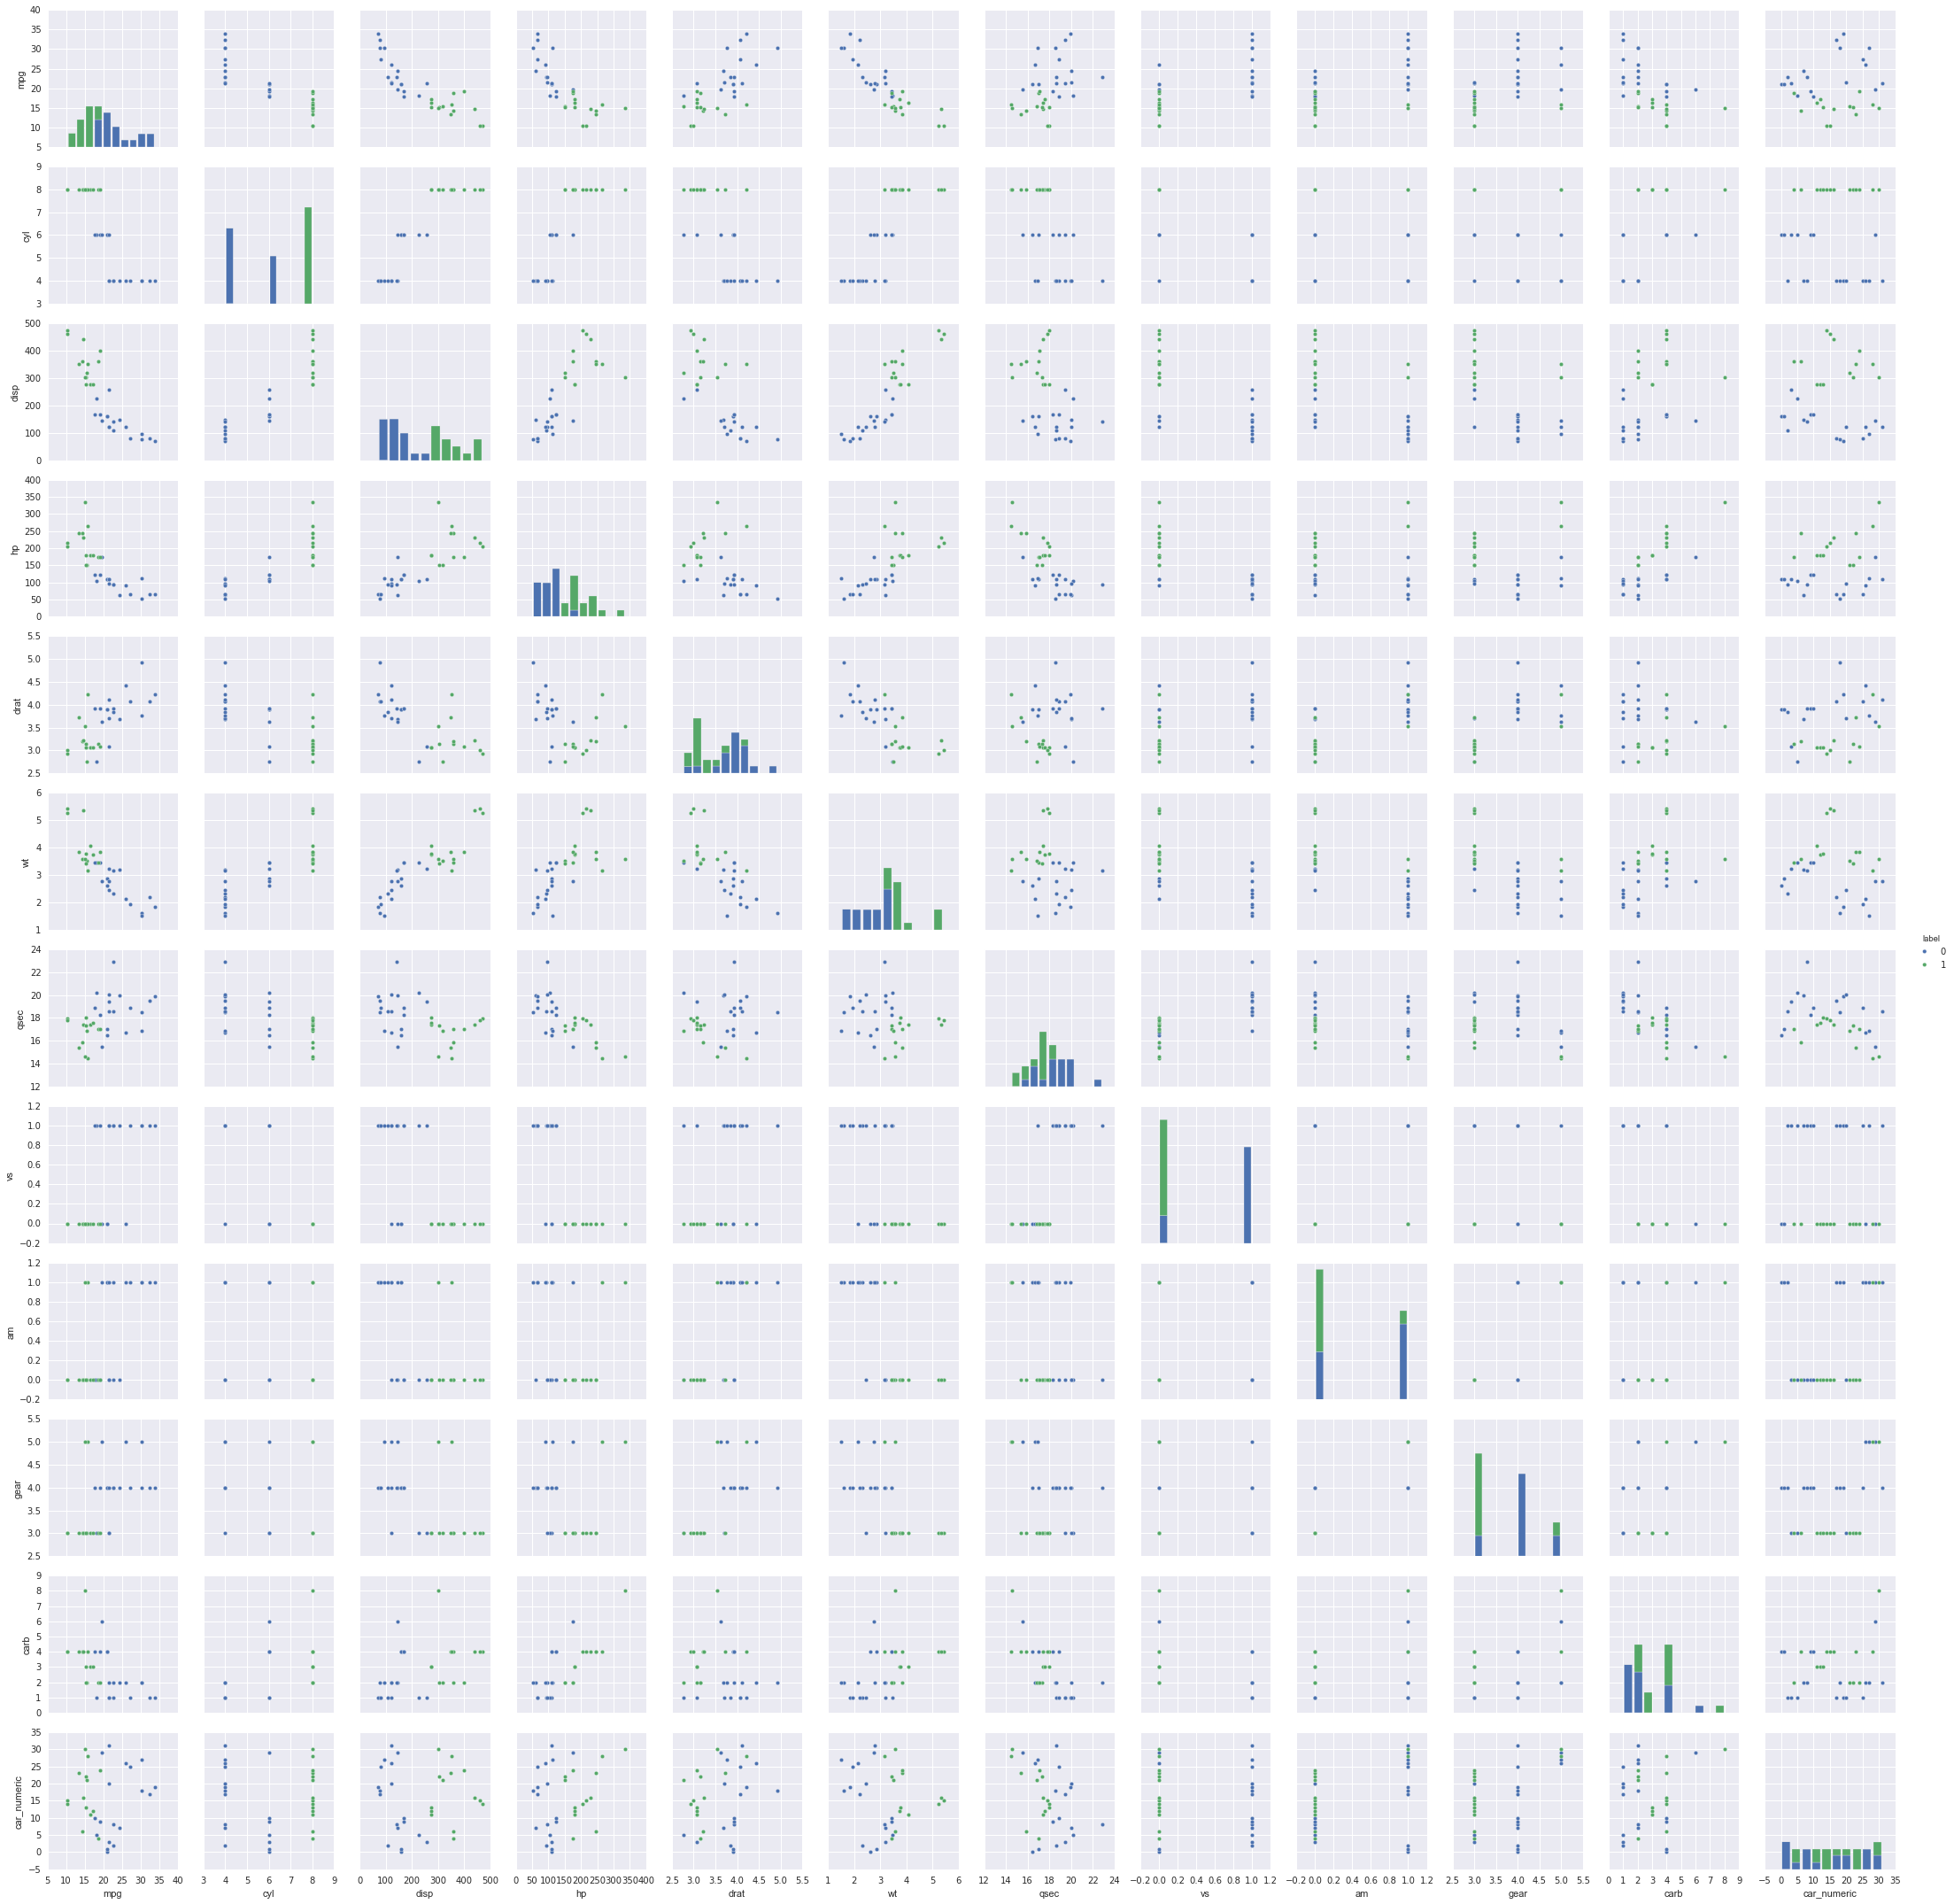

In [23]:
sns.pairplot(df, hue='label', vars=X.columns)

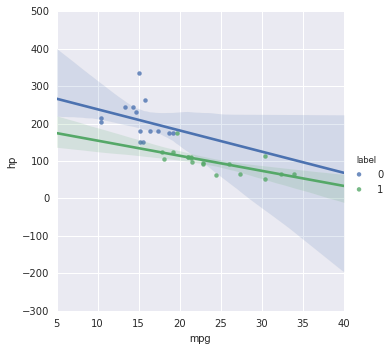

In [74]:
sns.lmplot('mpg', 'hp', data=df,  hue='label')

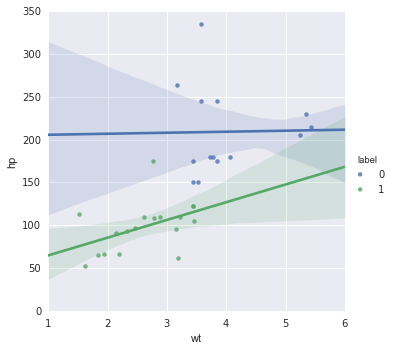

In [75]:
sns.lmplot('wt', 'hp', data=df,  hue='label')